# Tek Değişkene Bağlı Maaş Tahmini Uygulaması

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification, make_blobs
from sklearn.svm import SVC

In [2]:
data = {'Deneyim (Yıl)': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Maaş (K)': [30, 35, 40, 48, 50, 60, 65, 70, 78, 90]}
df = pd.DataFrame(data)

In [3]:
df.head()

,Deneyim (Yıl),Maaş (K)
0,1,30
1,2,35
2,3,40
3,4,48
4,5,50


In [5]:
df.tail()

,Deneyim (Yıl),Maaş (K)
5,6,60
6,7,65
7,8,70
8,9,78
9,10,90


In [6]:
# CSV olarak kaydetme
df.to_csv("maas_verisi.csv", index=False)

In [7]:
# CSV dosyasını okuma
df = pd.read_csv("/content/maas_verisi.csv")

X = df[['Deneyim (Yıl)']]
y = df['Maaş (K)']


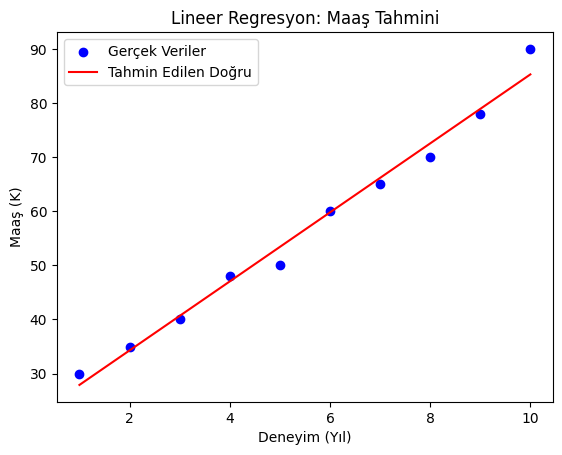

In [8]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, y_pred, color='red', label='Tahmin Edilen Doğru')
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (K)")
plt.title("Lineer Regresyon: Maaş Tahmini")
plt.legend()
plt.show()

In [13]:
# Polynomial Regresyon
#y = a + bx + cx2 + dx3 + ex4
poly = PolynomialFeatures(degree=9)  # 9 çok yüksek olabilir, overfitting yapabilir
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)


LinearRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


7.2 yıl deneyime sahip personel için maaş tahmini: 65.29K TL


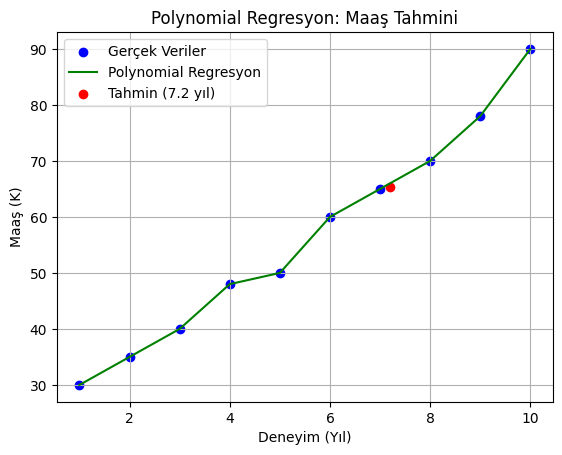

In [15]:
candidate_experience = 7.2


# Tahmin: 6.5 yıl deneyime sahip birinin maaşı
deneyim_yeni = np.array([[candidate_experience]])
deneyim_yeni_poly = poly.transform(deneyim_yeni)
maas_tahmini = poly_model.predict(deneyim_yeni_poly)

print(f"{candidate_experience} yıl deneyime sahip personel için maaş tahmini: {maas_tahmini[0]:.2f}K TL")

# Grafik
plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, poly_model.predict(X_poly), color='green', label='Polynomial Regresyon')
plt.scatter(candidate_experience, maas_tahmini, color='red', label=f'Tahmin ({candidate_experience} yıl)')
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş (K)")
plt.title("Polynomial Regresyon: Maaş Tahmini")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
# 1. Veri oluşturma
X_class, y_class = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

In [18]:
# 2. Eğitim/test verisi ayırma
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)


In [19]:
# 3. SVM model eğitimi
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

In [20]:
# 4. Başarı oranı yazdırma
print(f"Sınıflandırma Başarı Oranı: {accuracy_score(y_test, y_pred_class):.2f}")

Sınıflandırma Başarı Oranı: 0.78


In [21]:
# 5. Görselleştirme
def plot_decision_boundary(clf, X, y):
    plt.figure(figsize=(8, 6))
    # Renkler
    colors = ['red' if label == 0 else 'blue' for label in y]

    # Noktaları çiz
    plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k', s=50)

    # Karar sınırı için grid oluştur
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.c_[XX.ravel(), YY.ravel()]
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Sınır çizgileri
    plt.contour(XX, YY, Z, colors='green', levels=[0], alpha=0.8, linestyles=['-'])
    plt.title("SVM Sınıflandırması ve Karar Sınırı")
    plt.xlabel("Özellik 1")
    plt.ylabel("Özellik 2")
    plt.grid(True)
    plt.show()

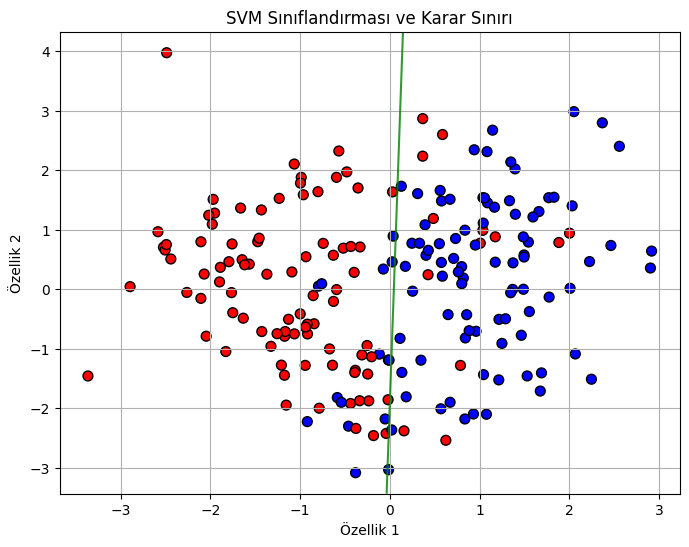

In [22]:
# 6. Fonksiyonu çağır
plot_decision_boundary(clf, X_class, y_class)

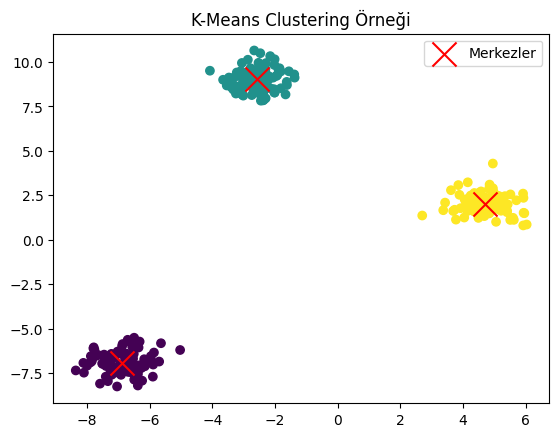

In [23]:
# 4. Clustering: K-Means ile Görselleştirme
X_cluster, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)

plt.scatter(X_cluster[:, 0], X_cluster[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Merkezler')
plt.title("K-Means Clustering Örneği")
plt.legend()
plt.show()